<a href="https://colab.research.google.com/github/SriramaPrabhu/Feature-engineering-using-Delhivery-dataset/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**
**Feature Engineering for Delhivery data**

**Insights:**

**Insight 1:**
Gurgaon and Bengaluru dominate as leading source cities, contributing nearly equal shipment volumes, indicating their role as primary logistics hubs driving significant outbound movement in the supply chain.

**Insight 2:**
Bengaluru emerges as the top destination city with highest inbound shipments, while Mumbai and Gurgaon follow, reflecting strong demand concentration in these metropolitan regions for goods distribution and consumption.

**Insight 3:**
Order volume peaked in 2018, with September alone driving the highest monthly demand, suggesting strong festive or Amazon or Flipkart's Great indian festival -driven consumption patterns during that period.

**Insight 4:**
The Allahabad–Allahabad lane shows reliability concerns, with median trip times 6.4x and P90 reaching 33.9x OSRM benchmarks across 15 trips, indicating systemic inefficiencies or potential operational/data quality issues.

**Insight 5:**
High-volume hubs such as Guwahati (Assam) and Jaipur (Rajasthan) show severe dwell delays, with P90 >3500 minutes despite moderate trip counts (75–94). The Gurgaon Bilaspur hub (Haryana), with 1063 trips, has sustained delays (median dwell 431 minutes, P90 3106 minutes) indicating systemic inefficiencies. On the destination side, Kolkata Dankuni hub (West Bengal) records extreme dwell (median 1286 minutes, P90 3355 minutes) across 197 trips, directly impacting delivery timelines.

#  **Recommendations**

<span style="color:darkblue; font-weight:bold">1. **Strengthen key hubs** (Gurgaon, Bengaluru):</span>  
Invest in **infrastructure and automation** at major source hubs to handle high outbound volumes efficiently and maintain reliability in peak demand seasons.  

<span style="color:darkblue; font-weight:bold">2. **Address operational bottlenecks** (Allahabad lane, Guwahati, Jaipur, Gurgaon Bilaspur, Kolkata Dankuni):</span>  
Conduct **process audits and manpower optimization** at bottleneck hubs and lanes; prioritize **Gurgaon Bilaspur** and **Kolkata Dankuni** due to high trip volumes and systemic dwell delays.  

<span style="color:darkblue; font-weight:bold">3. **Plan for seasonal spikes (September / festive months)**:</span>  
Align **fleet capacity, workforce, and hub throughput** with historical demand peaks to avoid SLA breaches and customer dissatisfaction during festival-driven surges.  

---

#  **Next Steps**

<span style="color:darkgreen; font-weight:bold">✔ Build a predictive ETA model:</span>  
Use features like `osrm_time`, `osrm_distance`, **hub dwell times**, and **trip timing** to proactively flag potential delays.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw=pd.read_csv('/content/delhivery_data.csv')

In [ ]:
df_raw.info()

In [4]:
df_raw.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
for col in df_raw.columns:
    print(f"\nColumn: {col}")
    print(df_raw[col].value_counts())

**Basic data cleaning and exploration**
1. Handle missing values in the data.
2. Converting time columns into pandas datetime.
3. Analyze structure & characteristics of the dataset.

In [6]:
null_counts = df_raw.isnull().sum()
print(null_counts)

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [7]:
df_raw[df_raw['source_name'].isnull()]['source_center'].value_counts()
df_raw[df_raw['destination_name'].isnull()]['destination_center'].value_counts()

,count
destination_center,
IND282002AAD,151
IND342902A1B,16
IND577116AAA,16
IND852118A1B,15
IND505326AAB,11
IND126116AAA,10
IND841301AAC,9
IND250002AAC,9
IND509103AAC,9


In [ ]:
# Step 1: Build a mapping from known destination_center to destination_name
destination_name_map = (
    df_raw[df_raw['destination_name'].notnull()]
    .drop_duplicates(subset=['destination_center'])
    .set_index('destination_center')['destination_name']
    .to_dict()
)

# Step 2: Impute missing destination_name using the mapping
df_raw['destination_name'] = df_raw.apply(
    lambda row: destination_name_map.get(row['destination_center'], row['destination_name']),
    axis=1
)

# Optional Step 3: For any still missing (e.g., truly unknown), fill with placeholder
df_raw['destination_name'].fillna('Unknown Destination', inplace=True)


In [9]:
# Build mapping from known source_center to source_name
source_name_map = (
    df_raw[df_raw['source_name'].notnull()]
    .drop_duplicates(subset=['source_center'])
    .set_index('source_center')['source_name']
    .to_dict()
)

# Impute missing source_name using the mapping
df_raw['source_name'] = df_raw.apply(
    lambda row: source_name_map.get(row['source_center'], row['source_name']),
    axis=1
)

# Fallback: fill any still-missing with placeholder
df_raw['source_name'] = df_raw['source_name'].fillna('Unknown Source')


In [ ]:
df_raw.info()

**Converting time related columns to datetime format**

In [11]:
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

for col in time_columns:
    df_raw[col] = pd.to_datetime(df_raw[col], errors='coerce')


In [12]:
df_raw[time_columns].dtypes

,0
trip_creation_time,datetime64[ns]
od_start_time,datetime64[ns]
od_end_time,datetime64[ns]
cutoff_timestamp,datetime64[ns]


**Structure of the Dataset**

In [13]:
df_raw.shape

(144867, 24)

In [14]:
df_raw.dtypes.value_counts()

,count
float64,10
object,8
datetime64[ns],4
bool,1
int64,1


In [15]:
categorical_cols = df_raw.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['data', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name']


In [16]:
df_raw[categorical_cols].nunique().sort_values(ascending=False)

,0
trip_uuid,14817
source_center,1508
route_schedule_uuid,1504
source_name,1499
destination_center,1481
destination_name,1469
route_type,2
data,2


In [17]:
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)


['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']


In [ ]:
df_raw[numerical_cols].describe().T

In [19]:
bool_cols = df_raw.select_dtypes(include='bool').columns.tolist()
print(bool_cols)


['is_cutoff']


In [20]:
df_raw['segment_key'] = (
    df_raw['trip_uuid'].astype(str) + '_' +
    df_raw['source_center'].astype(str) + '_' +
    df_raw['destination_center'].astype(str)
)

In [21]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df_raw[col + '_sum'] = df_raw.groupby('segment_key')[col].cumsum()


df_raw[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [22]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

In [23]:
segment = df_raw.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [ ]:
segment

In [25]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10374,10374,trip-153741093647649320_IND388121AAA_IND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
10375,10375,trip-153741093647649320_IND388620AAB_IND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


In [ ]:
segment.info()

### Calculate time taken between od_start_time and od_end_time and keep it as a feature.

---



- od_time_diff_hour is matching with start_scan_to_end_scan

In [27]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26363,62.115193
26364,91.087797
26365,44.174403
26366,287.474007


In [ ]:
segment

In [29]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [30]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [ ]:
trip

In [32]:
trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [33]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14812,57.762332,73.4630
14813,15.513784,16.0882
14814,38.684839,58.9037
14815,134.723836,171.1103


In [34]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [37]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


In [38]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [39]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14812,punjab,chandigarh,mehmdpur,h
14813,haryana,faridabad,blbgarh,dc
14814,uttar pradesh,kanpur,govndngr,dc
14815,tamil nadu,tirchchndr,shnmgprm,d


In [40]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [41]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14812,punjab,chandigarh,mehmdpur,h
14813,haryana,fbd,balabhgarh,dpc
14814,uttar pradesh,kanpur,govndngr,dc
14815,tamil nadu,tirunelveli,vdkkusrt,i


In [ ]:
trip

In [ ]:
trip.info()

Insights about Cities, Orders

In [49]:
print("Top 4 source cities:")
print(trip['source_city'].value_counts().head(3))

print("\nTop 4 destination cities:")
print(trip['destination_city'].value_counts().head(3))

Top 4 source cities:
source_city
gurgaon      1139
bengaluru    1131
bhiwandi      697
Name: count, dtype: int64

Top 4 destination cities:
destination_city
bengaluru    1221
mumbai        968
gurgaon       877
Name: count, dtype: int64


In [42]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [43]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14812,2018,10,23,3,40,2
14813,2018,10,23,3,40,2
14814,2018,10,23,3,40,2
14815,2018,10,23,3,40,2


In [50]:
print("Year with most orders:")
print(trip['trip_year'].value_counts().head(1))

print("\nMonth with most orders:")
print(trip['trip_month'].value_counts().head(1))

print("\nDay of the month with most orders:")
print(trip['trip_day'].value_counts().head(1))

Year with most orders:
trip_year
2018    14817
Name: count, dtype: int64

Month with most orders:
trip_month
9    13029
Name: count, dtype: int64

Day of the month with most orders:
trip_day
18    791
Name: count, dtype: int64


In [55]:
import pandas as pd

# Step 1: create reliability ratio
trip['time_ratio'] = trip['actual_time'] / trip['osrm_time']

# Step 2: group by lane (source_city → destination_city)
lane_reliability = (
    trip.groupby(['source_city', 'destination_city'])
    .agg(
        trips=('trip_uuid', 'count'),
        median_ratio=('time_ratio', 'median'),   # P50
        p90_ratio=('time_ratio', lambda x: x.quantile(0.90))
    )
    .reset_index()
)

# Step 3: sort to see worst performing lanes (highest P90 ratio)
lane_reliability = lane_reliability.sort_values(by='p90_ratio', ascending=False)

print(lane_reliability.head(10))  # top 10 lanes with worst reliability


     source_city destination_city  trips  median_ratio  p90_ratio
598        gonda        balrampur      1     77.387097  77.387097
600        gonda         tulsipur      1     50.720000  50.720000
48     allahabad        allahabad     15      6.400000  33.855172
1133     mariani           jorhat      1     32.937500  32.937500
782     jabalpur         jabalpur      6     15.562500  31.843750
802    jairampur       margherita      1     28.903226  28.903226
1105      malvan       sawantwadi      2     26.902273  27.144091
1481     shirpur            dhule      5     22.104167  23.130435
296         bhuj            anjar      1     22.925926  22.925926
1           agra             agra      3     10.627907  22.485581


In [61]:
# Source center dwell times with names
source_bottlenecks = (
    trip.groupby(['source_center', 'source_name'])
    .agg(
        trips=('trip_uuid', 'count'),
        median_dwell=('start_scan_to_end_scan', 'median'),
        p90_dwell=('start_scan_to_end_scan', lambda x: x.quantile(0.90))
    )
    .reset_index()
)

source_bottlenecks = source_bottlenecks[source_bottlenecks['trips'] >= 5]
source_bottlenecks = source_bottlenecks.sort_values(by='p90_dwell', ascending=False)


# Destination center dwell times with names
destination_bottlenecks = (
    trip.groupby(['destination_center', 'destination_name'])
    .agg(
        trips=('trip_uuid', 'count'),
        median_dwell=('start_scan_to_end_scan', 'median'),
        p90_dwell=('start_scan_to_end_scan', lambda x: x.quantile(0.90))
    )
    .reset_index()
)

destination_bottlenecks = destination_bottlenecks[destination_bottlenecks['trips'] >= 50]
destination_bottlenecks = destination_bottlenecks.sort_values(by='p90_dwell', ascending=False)

print(source_bottlenecks.head(5))
print(destination_bottlenecks.head(5))


    source_center                         source_name  trips  median_dwell  \
856  IND781018AAB                guwahati_hub (assam)     75         901.0   
234  IND302014AAA              jaipur_hub (rajasthan)     94         845.0   
456  IND462022AAA  bhopal_trnsport_h (madhya pradesh)     85         527.0   
8    IND000000ACB       gurgaon_bilaspur_hb (haryana)   1063         431.0   
772  IND712311AAA    kolkata_dankuni_hb (west bengal)    245         371.0   

     p90_dwell  
856     3569.0  
234     3559.1  
456     3474.4  
8       3106.6  
772     2734.2  
    destination_center                    destination_name  trips  \
255       IND302014AAA              jaipur_hub (rajasthan)     66   
22        IND110037AAM             delhi_airport_h (delhi)    159   
849       IND712311AAA    kolkata_dankuni_hb (west bengal)    197   
4         IND000000ACB       gurgaon_bilaspur_hb (haryana)    821   
490       IND462022AAA  bhopal_trnsport_h (madhya pradesh)    119   

     median_dw

**Insights:**

**Insight 1:**
Gurgaon and Bengaluru dominate as leading source cities, contributing nearly equal shipment volumes, indicating their role as primary logistics hubs driving significant outbound movement in the supply chain.

**Insight 2:**
Bengaluru emerges as the top destination city with highest inbound shipments, while Mumbai and Gurgaon follow, reflecting strong demand concentration in these metropolitan regions for goods distribution and consumption.

**Insight 3:**
Order volume peaked in 2018, with September alone driving the highest monthly demand, suggesting strong festive or Amazon or Flipkart's Great indian festival -driven consumption patterns during that period.

**Insight 4:**
The Allahabad–Allahabad lane shows reliability concerns, with median trip times 6.4x and P90 reaching 33.9x OSRM benchmarks across 15 trips, indicating systemic inefficiencies or potential operational/data quality issues.

**Insight 5:**
High-volume hubs such as Guwahati (Assam) and Jaipur (Rajasthan) show severe dwell delays, with P90 >3500 minutes despite moderate trip counts (75–94). The Gurgaon Bilaspur hub (Haryana), with 1063 trips, has sustained delays (median dwell 431 minutes, P90 3106 minutes) indicating systemic inefficiencies. On the destination side, Kolkata Dankuni hub (West Bengal) records extreme dwell (median 1286 minutes, P90 3355 minutes) across 197 trips, directly impacting delivery timelines.

In [54]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'source_state', 'source_city',
       'source_place', 'source_code', 'trip_year', 'trip_month', 'trip_hour',
       'trip_day', 'trip_week', 'trip_dayofweek'],
      dtype='object')

In [51]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

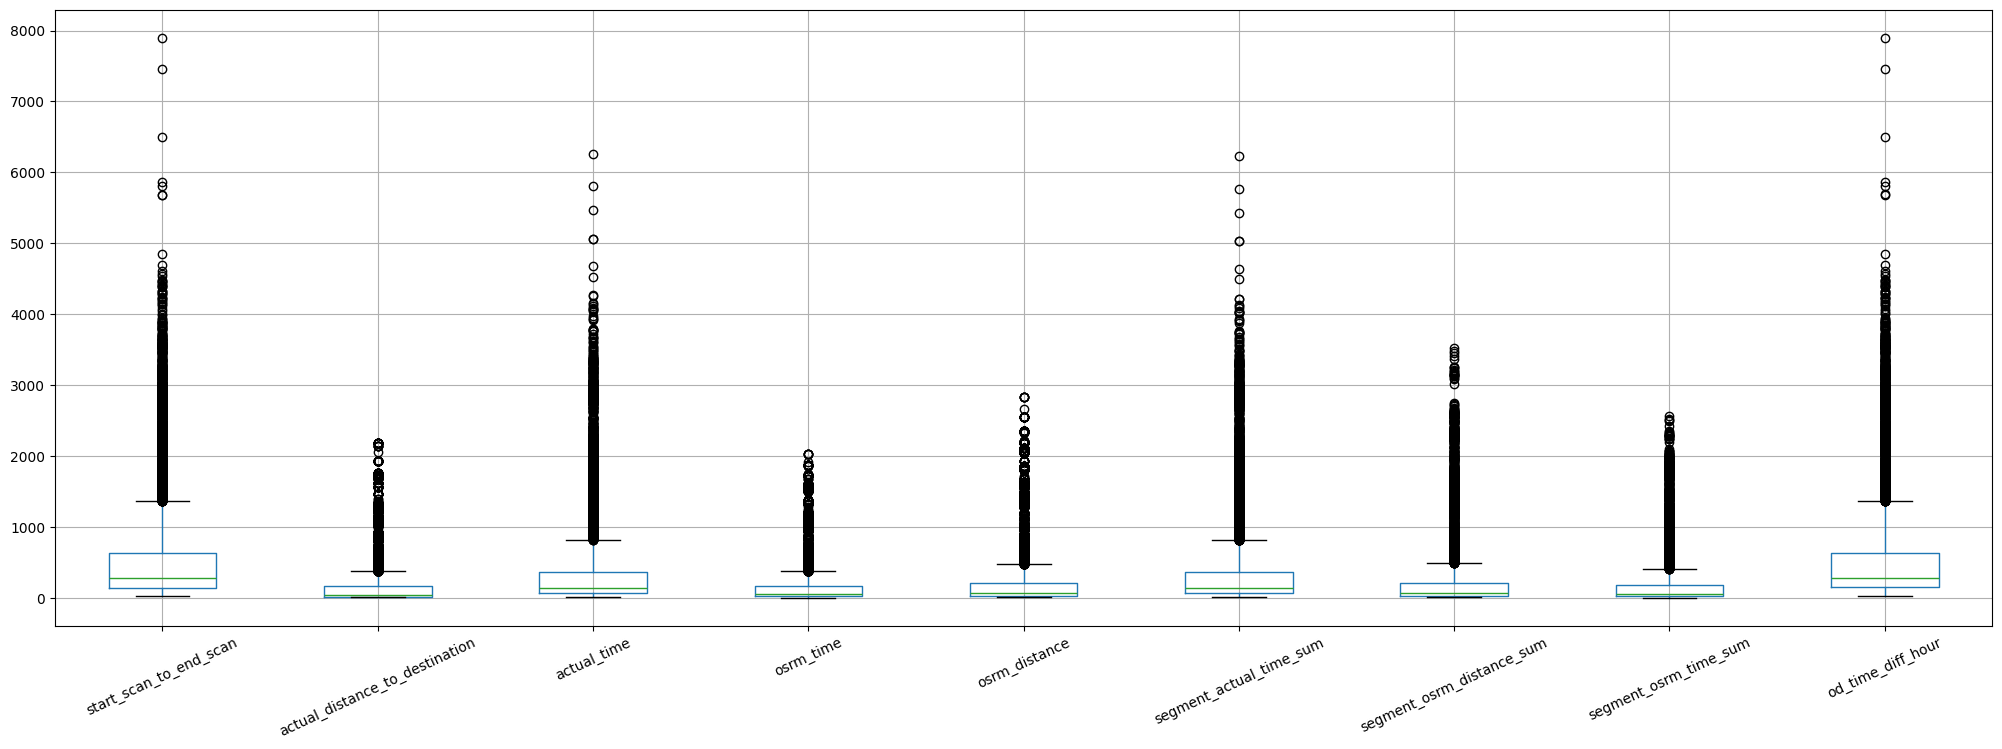

In [52]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

### Handle the outliers using IQR method

In [62]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [63]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

<Axes: >

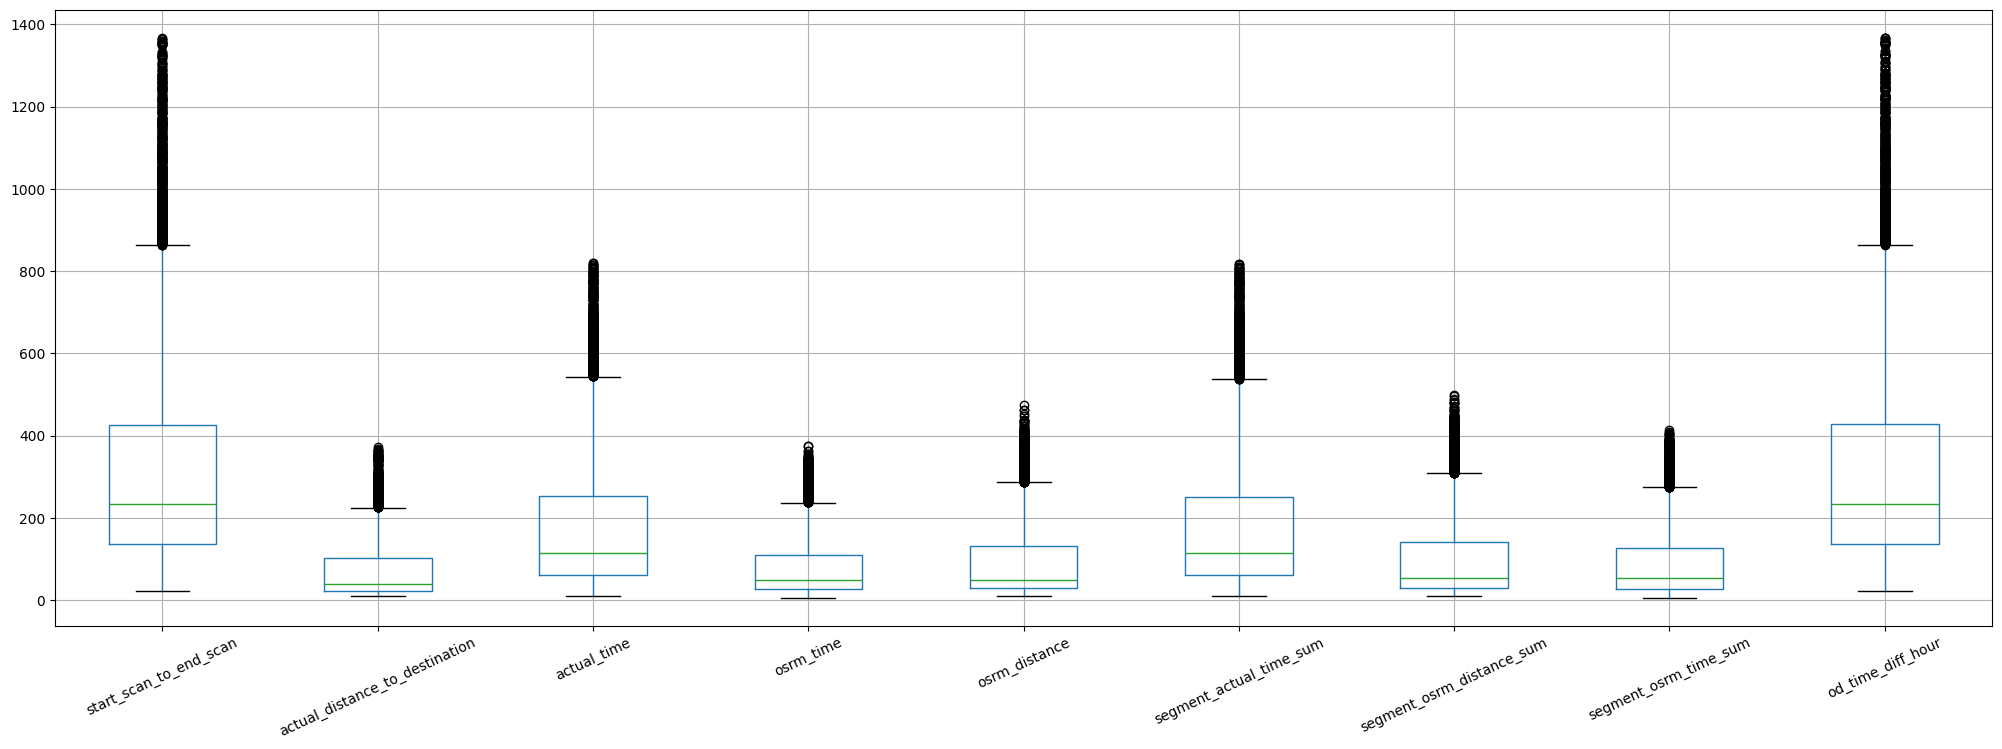

In [64]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [65]:
### Only two route_type – Do one hot encoding

In [66]:
trip['route_type'].value_counts()

,count
route_type,
Carting,8817
FTL,3942


In [67]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [70]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [71]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.551781,0.004976,-0.223508,-0.150681,-0.080602,-0.227130,-0.151645,-0.268226,-0.548105
1,-0.862589,-0.766880,-0.751536,-0.878175,-0.806104,-0.746018,-0.825232,-0.879530,-0.862847
2,1.534514,0.752716,1.021129,0.521909,0.603318,1.032122,0.504029,0.355554,1.534486
3,-0.516816,-0.664606,-0.738964,-0.768365,-0.713134,-0.739690,-0.739473,-0.792201,-0.513666
4,-0.870359,-0.878152,-0.971547,-0.905628,-0.891056,-0.967495,-0.907535,-0.916957,-0.872505
...,...,...,...,...,...,...,...,...,...
12754,-0.252629,-0.207579,-0.600671,-0.233038,-0.209756,-0.600476,-0.354145,-0.305653,-0.251600
12755,-1.017993,-0.789776,-0.990406,-0.919354,-0.845930,-0.986478,-0.864909,-0.941908,-1.017680
12756,0.384526,-0.470472,0.650252,-0.425207,-0.371190,0.658775,0.065130,0.018713,0.385089
12757,0.097029,0.852973,0.537103,1.372940,0.872963,0.513234,1.307779,1.677967,0.099486


In [72]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04
mean,7.295329e-17,-3.341372e-18,-2.227581e-17,-7.685155e-17,-2.227581e-18,-3.786888e-17,1.113791e-18,-8.576188e-17,1.102653e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.161741e+00,-8.795036e-01,-1.065838e+00,-1.001712e+00,-9.237163e-01,-1.062413e+00,-9.383855e-01,-1.004286e+00,-1.161744e+00
25%,-7.227256e-01,-7.085171e-01,-7.389638e-01,-7.134593e-01,-7.096382e-01,-7.396902e-01,-7.245542e-01,-7.298227e-01,-7.218003e-01
50%,-3.419863e-01,-4.706378e-01,-3.995173e-01,-3.977542e-01,-4.841527e-01,-3.979836e-01,-4.649355e-01,-4.179329e-01,-3.433922e-01
75%,4.078368e-01,4.152532e-01,4.742429e-01,4.395507e-01,4.382701e-01,4.689385e-01,4.480913e-01,5.052611e-01,4.071949e-01
max,4.055940e+00,4.142566e+00,4.032144e+00,4.077023e+00,4.232902e+00,4.056857e+00,4.180276e+00,4.073281e+00,4.052774e+00


Data set preparation for Training

In [76]:
# Target
y = trip['actual_time']

# Input features (your simplified set)
feature_cols = [
    'osrm_time', 'osrm_distance',
    'segment_osrm_time_sum', 'segment_osrm_distance_sum',
    'start_scan_to_end_scan',
    'trip_hour', 'trip_dayofweek', 'trip_month', 'trip_week',
    'source_state', 'destination_state',
    'route_type'
]

X = trip[feature_cols].copy()


In [77]:
# Split into train and test based on 'data' column
X_train = X[trip['data'] == 'train']
y_train = y[trip['data'] == 'train']

X_test = X[trip['data'] == 'test']
y_test = y[trip['data'] == 'test']


# 📌 **Recommendations**

<span style="color:darkblue; font-weight:bold">1. **Strengthen key hubs** (Gurgaon, Bengaluru):</span>  
Invest in **infrastructure and automation** at major source hubs to handle high outbound volumes efficiently and maintain reliability in peak demand seasons.  

<span style="color:darkblue; font-weight:bold">2. **Address operational bottlenecks** (Allahabad lane, Guwahati, Jaipur, Gurgaon Bilaspur, Kolkata Dankuni):</span>  
Conduct **process audits and manpower optimization** at bottleneck hubs and lanes; prioritize **Gurgaon Bilaspur** and **Kolkata Dankuni** due to high trip volumes and systemic dwell delays.  

<span style="color:darkblue; font-weight:bold">3. **Plan for seasonal spikes (September / festive months)**:</span>  
Align **fleet capacity, workforce, and hub throughput** with historical demand peaks to avoid SLA breaches and customer dissatisfaction during festival-driven surges.  

---

# 🚀 **Next Steps**

<span style="color:darkgreen; font-weight:bold">✔ Build a predictive ETA model:</span>  
Use features like `osrm_time`, `osrm_distance`, **hub dwell times**, and **trip timing** to proactively flag potential delays.  

